In [60]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [61]:
df = pd.read_csv('https://raw.githubusercontent.com/abdullabasim/dataset/main/diabetes.csv')

In [62]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [64]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


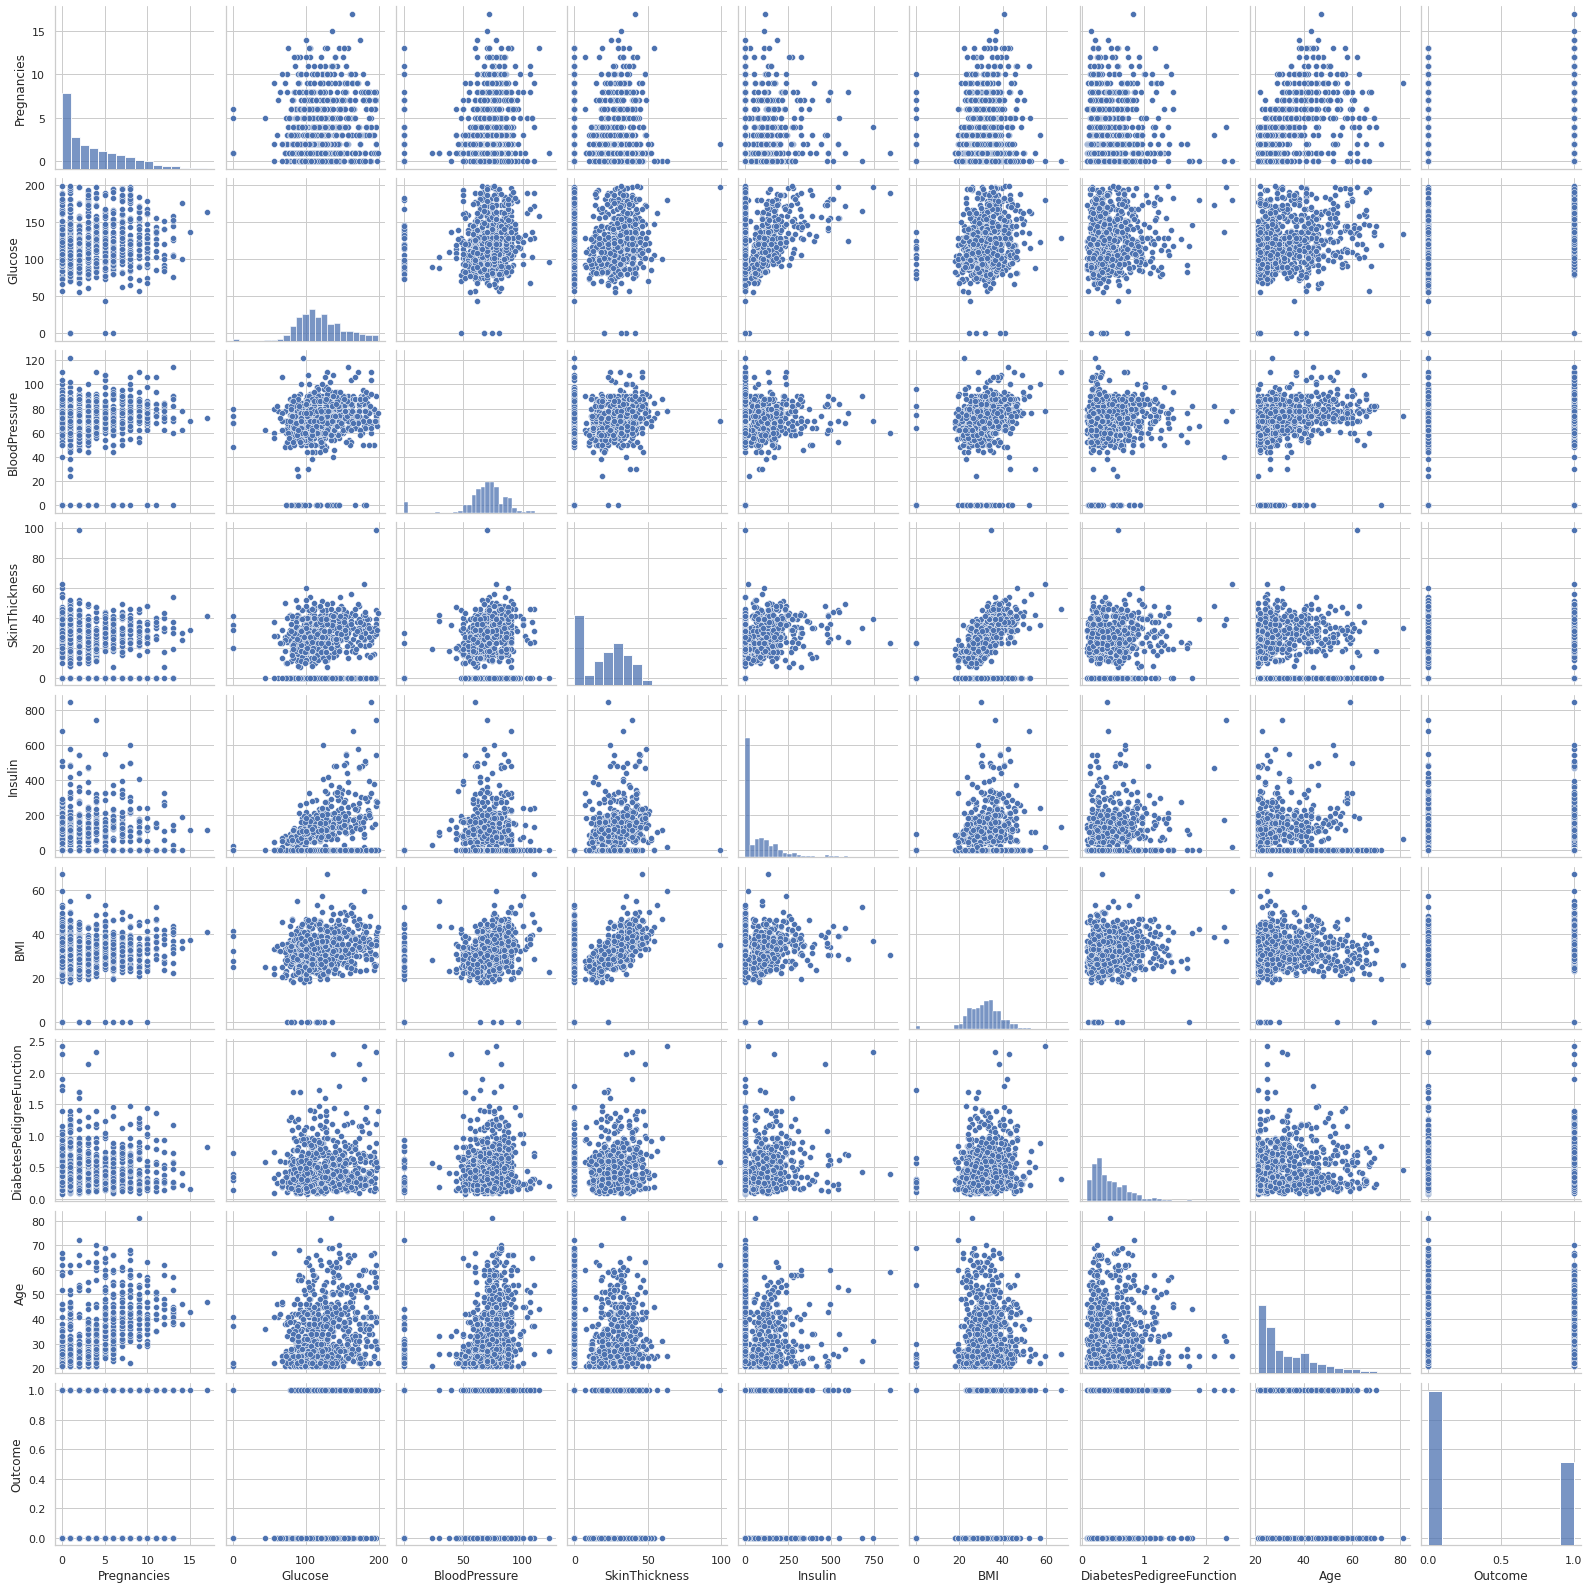

In [65]:
sns.pairplot(df)

Text(0, 0.5, 'Insulin')

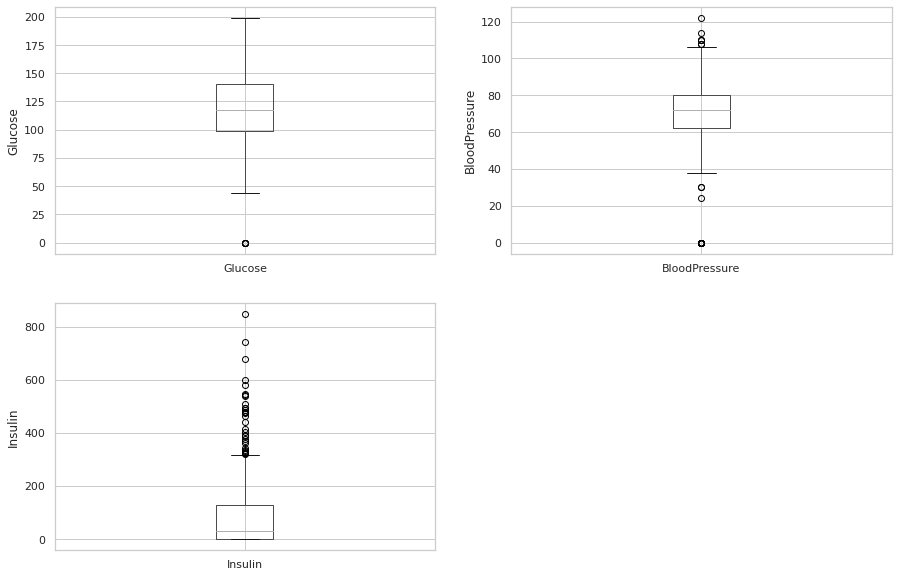

In [66]:


plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Glucose')
fig.set_title('')
fig.set_ylabel('Glucose')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='BloodPressure')
fig.set_title('')
fig.set_ylabel('BloodPressure')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='Insulin')
fig.set_title('')
fig.set_ylabel('Insulin')



In [67]:
def outlier(df,feature):
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_band = Q1 - 1.5 * IQR
    upper_band = Q3 + 1.5 * IQR

    print("lower is : ",lower_band)

    return df.index[(df[feature] < lower_band) | (df[feature] > upper_band)]


Get and handle **Glucose** outliers

lower is :  37.125


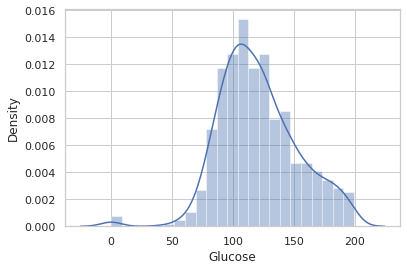

In [68]:
glucose_outliers_list = outlier(df , 'Glucose')

sns.distplot(df.Glucose)
df.Glucose = np.where(  (df.index.isin(glucose_outliers_list)), df.Glucose.mean().astype(int), df.Glucose )




Get and handle BloodPressure outliers

lower is :  40.0


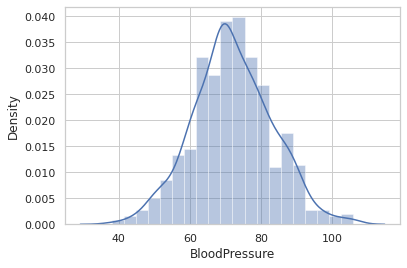

In [82]:
blood_pressure_outliers_list = outlier(df , 'BloodPressure')

sns.distplot(df.BloodPressure)

df.BloodPressure = np.where(  (df.index.isin(blood_pressure_outliers_list)), df.BloodPressure.mean().astype(int), df.BloodPressure )

Get and handle **Insulin** outliers

lower is :  -150.0
Int64Index([254, 335], dtype='int64')


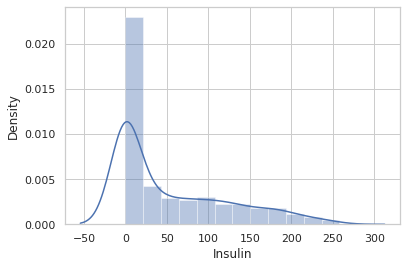

In [80]:
insulin_outliers_list = outlier(df , 'Insulin')
print(insulin_outliers_list)
sns.distplot(df.Insulin)

df.Insulin = np.where(  (df.index.isin(insulin_outliers_list)), df.Insulin.median().astype(int), df.Insulin )

<AxesSubplot:xlabel='Outcome', ylabel='count'>

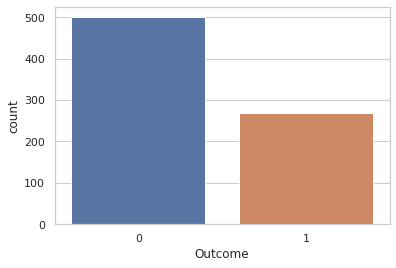

In [85]:
sns.countplot(x='Outcome',data=df)

In [124]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [125]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)


In [126]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(y_train)
print(x_train)

709    1
425    1
135    0
630    1
500    0
      ..
75     0
599    0
575    0
337    1
523    1
Name: Outcome, Length: 614, dtype: int64
[[-0.5288778  -0.94295451 -0.73132886 ...  0.73836846  0.62083528
  -0.86196915]
 [ 0.07415093  2.06667877  0.55032311 ...  0.61132398 -0.64915711
  -0.19012014]
 [-0.5288778   0.11537807 -1.09751514 ...  0.20478164 -1.19432458
  -0.19012014]
 ...
 [-0.83039216 -0.08305929 -2.56226024 ...  0.42075725 -0.59959643
  -0.6940069 ]
 [ 0.37566529 -0.21535086  0.36722997 ... -0.12553402 -0.40445126
   0.9016345 ]
 [ 1.58172274  0.28074254 -0.18204945 ...  0.25559943  0.55268935
   0.98561563]]


In [127]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"],"solver":['newton-cg', 'lbfgs', 'liblinear']}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.7704918032786885


In [128]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(C = 10,penalty ='l2',solver='lbfgs')
logmodel.fit(x_train,y_train)

LogisticRegression(C=10)

In [129]:
y_pred = logmodel.predict(x_test)

y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [130]:
from sklearn.metrics import confusion_matrix ,accuracy_score
confusion_matrix(y_test,y_pred)

accuracy_score(y_test, y_pred) * 100

77.92207792207793

In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       103
           1       0.69      0.61      0.65        51

    accuracy                           0.78       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.78      0.78       154

